# 합성곱 신경망Ⅰ
## DNN (fashion_mnist)

In [1]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# (훈련데이터셋, 레이블), (테스트데이터셋, 레이블)
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()     # 훈련, 테스트 데이터가 분리되어 있음.

In [3]:
# numpy 구조로 받아들임
print(x_train.shape)       # 60000, 28, 28 : 60000개, 28행, 28열 
print(y_train.shape)       # 60000         : 
print(x_test.shape)        # 10000, 28, 28 : 
print(y_test.shape)        # 60000         : 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(x_train[0])          # 28행, 28열 / 숫자가 클수록 밝은 색 (회색조)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(y_train[0])          # 분류 결과 : 9번 (아직 Ankle boot인지는 모르지만 종류별로 분류했을때 9번이 나옴)

9


In [6]:
# 분류에 사용될 클래스
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

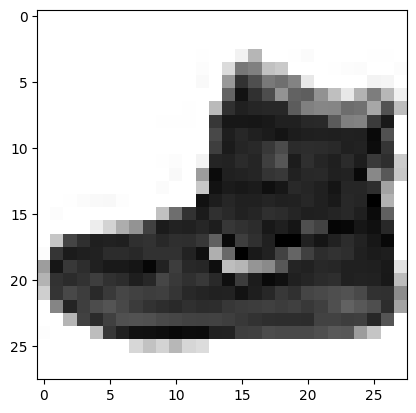

In [7]:
# 출력 확인
plt.imshow(x_train[0], cmap=plt.cm.binary) # 색반전 부츠 출력
#plt.imshow(x_train[0], cmap=plt.cm.gray)   # 회색조 부츠 출력
plt.show()

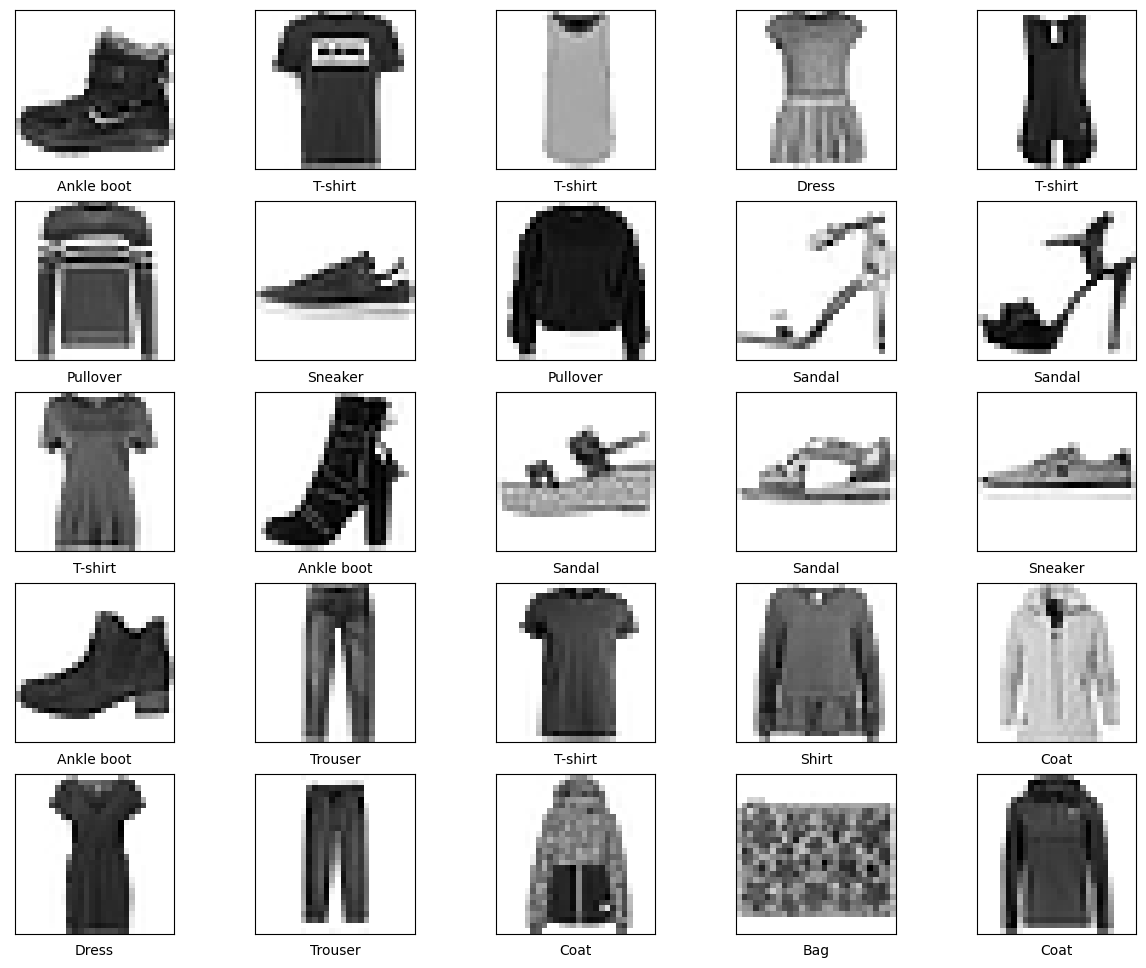

In [8]:
# 25개의 이미지 출력
plt.figure(figsize=(15,12))
for i in range(25):
    plt.subplot(5, 5, i+1)                # 5행5열, 그림위치
#    plt.title(class_names[y_train[i]])    # 분류 항목 표시(위)
    plt.xlabel(class_names[y_train[i]])   # 분류 항목 표시(아래)
    plt.grid(False)           
    plt.xticks([])                        # x눈금 삭제
    plt.yticks([])                        # y눈금 삭제
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [9]:
# 심층 신경망을 이용한 모델 생성 및 훈련
x_train, x_test = x_train / 255.0, x_test / 255.0        # 정규화 (minmax scale 방법이랑 같음)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),        # H1(784) : 28행28열로 들어온 입력을 1차원 리스트로 만들어줌
    tf.keras.layers.Dense(128, activation='relu'),       # H2(128) : 노드개수 지정, 활성화함수 = 렐루
    tf.keras.layers.Dropout(0.2),                        # 과적합 방지 위해 20%를 잘라냄
    tf.keras.layers.Dense(10, activation='softmax')      # 출력레이어 : 분류문제일 경우 softmax
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',                         # 
              loss='sparse_categorical_crossentropy',   # 정답레이블 숫자로 사용 / categorical_crossentropy : 원핫 인코딩 방법
              metrics=['accuracy'])                     # 분류문제일 경우 정확도 정보 추출 필요 (acc / accuracy)

history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2) # 검증용으로 20% 사용, 32개 묶음 마다 가중치 수정
                                                        # 60000개 중 48000개 훈련, 12000개 테스트 + 10000개 테스트데이터 따로
                                                        # val_accuracy : 검증데이터 정확도

Epoch 1/15
1500/1500 [==============================] - 1s 951us/step - loss: 0.5593 - accuracy: 0.8047 - val_loss: 0.4441 - val_accuracy: 0.8399
Epoch 2/15
1500/1500 [==============================] - 1s 854us/step - loss: 0.4134 - accuracy: 0.8511 - val_loss: 0.4125 - val_accuracy: 0.8438
Epoch 3/15
1500/1500 [==============================] - 1s 822us/step - loss: 0.3744 - accuracy: 0.8649 - val_loss: 0.3791 - val_accuracy: 0.8625
Epoch 4/15
1500/1500 [==============================] - 1s 810us/step - loss: 0.3520 - accuracy: 0.8704 - val_loss: 0.3381 - val_accuracy: 0.8755
Epoch 5/15
1500/1500 [==============================] - 1s 833us/step - loss: 0.3362 - accuracy: 0.8759 - val_loss: 0.3456 - val_accuracy: 0.8793
Epoch 6/15
1500/1500 [==============================] - 1s 833us/step - loss: 0.3230 - accuracy: 0.8813 - val_loss: 0.3333 - val_accuracy: 0.8834
Epoch 7/15
1500/1500 [==============================] - 1s 823us/step - loss: 0.3120 - accuracy: 0.8844 - val_loss: 0.3275 -

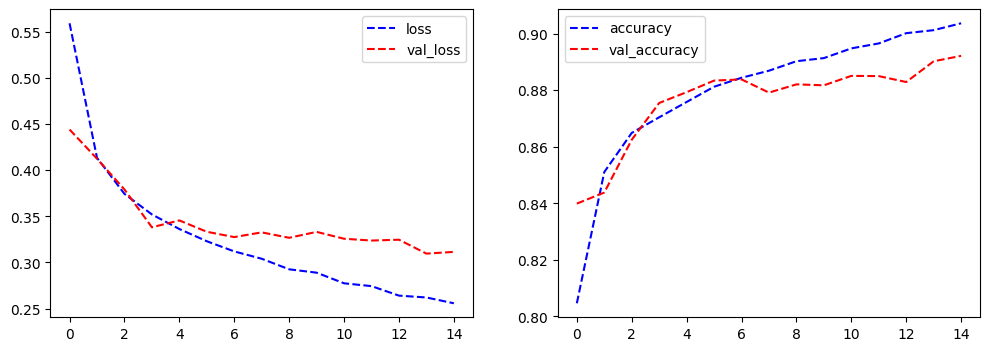

In [11]:
# 훈련결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # loss (loss, val_loss)
plt.plot(history.history['loss'], 'b--', label='loss')                  # 훈련 손실
plt.plot(history.history['val_loss'], 'r--', label='val_loss')          # 검증 손실
plt.legend()

plt.subplot(1,2,2) # accuracy (accuracy, val_accuracy)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')          # 훈련 정확도
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')  # 검증 정확도
plt.legend()
plt.show()

In [12]:
# 테스트 데이터셋으로 평가 (10000개)
model.evaluate(x_test, y_test, verbose=2)  # 손실과 정확도 측정

313/313 - 0s - loss: 0.3436 - accuracy: 0.8828


[0.3436485230922699, 0.8827999830245972]

[1.5686978e-09 1.4856637e-09 4.8584175e-12 5.1051719e-12 3.7167405e-11
 3.1995506e-04 1.1957311e-09 3.2082249e-03 2.1417616e-08 9.9647176e-01]
9
9


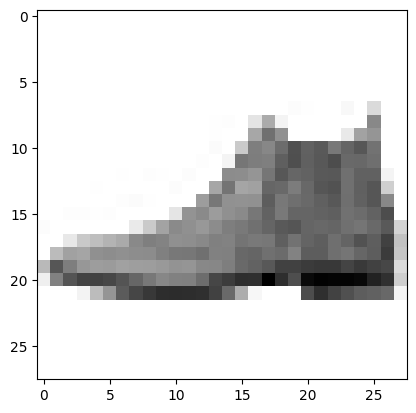

In [13]:
pred = model.predict(x_test)      # 지정된 데이터셋으로 예측, 10000개
print(pred[0])                    # 비율이 무엇인지?
print(np.argmax(pred[0]))         # 최대값의 인덱스 추출
print(y_test[0])                  # 정답

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

## CNN (fashion_mnist)

In [ ]:
# CNN 적용한 fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# CNN에 필요한 입력차원은 3차원이므로 데이터셋 차원 변경
print(x_train.shape)  # 2차원
x_train_cnn = x_train.reshape((-1,28,28,1)) / 255    # 3차원 변경 및 정규화
x_test_cnn = x_test.reshape((-1,28,28,1)) / 255
print(x_train_cnn.shape)  # 3차원

In [15]:
print(x_train_cnn[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [4]:
model_cnn = tf.keras.Sequential([   # 층쌓기 함수 Sequential
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)), # padding : 입력크기 = 출력크기
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn.summary()
# 특성 추출 -> 최대값 추출 -> 특성 추출 -> 최대값 추출 => 신경망

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_cnn.fit(x_train_cnn, y_train, epochs=5, 
                        batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4232 - accuracy: 0.8481 - val_loss: 0.2987 - val_accuracy: 0.8943
Epoch 2/5
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2724 - accuracy: 0.9013 - val_loss: 0.2557 - val_accuracy: 0.9087
Epoch 3/5
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2267 - accuracy: 0.9171 - val_loss: 0.2428 - val_accuracy: 0.9119
Epoch 4/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1953 - accuracy: 0.9277 - val_loss: 0.2272 - val_accuracy: 0.9182
Epoch 5/5
1500/1500 [==============================] - 26s 18ms/step - loss: 0.1685 - accuracy: 0.9376 - val_loss: 0.2245 - val_accuracy: 0.9183


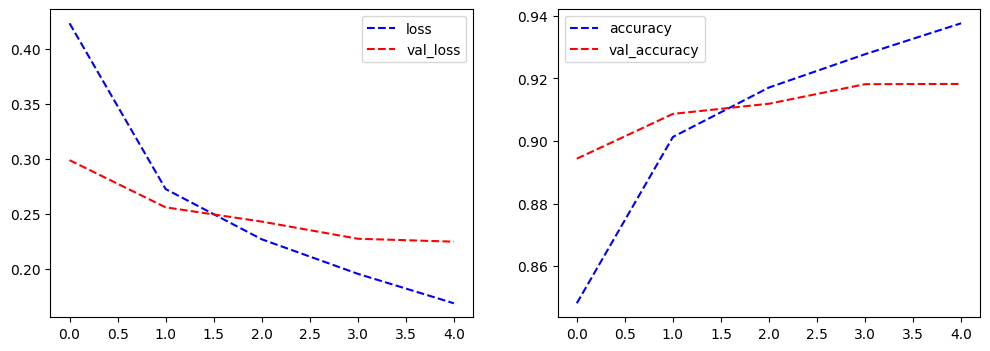

In [8]:
# 훈련결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # loss (loss, val_loss)
plt.plot(history.history['loss'], 'b--', label='loss')                  # 훈련 손실
plt.plot(history.history['val_loss'], 'r--', label='val_loss')          # 검증 손실
plt.legend()

plt.subplot(1,2,2) # accuracy (accuracy, val_accuracy)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')          # 훈련 정확도
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')  # 검증 정확도
plt.legend()
plt.show()

In [10]:
# 테스트 데이터셋으로 평가 (10000개)
model_cnn.evaluate(x_test_cnn, y_test, verbose=2)  # 손실과 정확도 측정

313/313 - 1s - loss: 0.2423 - accuracy: 0.9151


[0.2422887682914734, 0.9150999784469604]